# Pyber

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Read in data
city_data = pd.read_csv("instructions/pyber/raw_data/city_data.csv")
ride_data = pd.read_csv("instructions/pyber/raw_data/ride_data.csv")
#city_data.head()
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [3]:
pyber_data1 = pd.merge(ride_data, city_data, on="city", how="left")
pyber_data1.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [4]:
#Set new index
pyber_data = pyber_data1.set_index("city")
pyber_data.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [5]:
#Rural filter
rural_pyber_data = pyber_data[pyber_data['type'] == "Rural"]
rural_pyber_data.head()


,date,fare,ride_id,driver_count,type
city,,,,,
Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural
New Johnbury,2016-04-21 08:30:25,56.60,9002881309143,6,Rural
South Joseph,2016-02-17 01:41:29,57.52,7365786843443,3,Rural
Kennethburgh,2016-10-19 13:13:17,24.43,2728236352387,3,Rural


In [6]:
#rural data items for bubble chart
rural_avg_fare = rural_pyber_data.groupby(["city"]).mean()["fare"].rename("Average Fare by City")
rural_tot_rides = rural_pyber_data.groupby(["city"]).count()["ride_id"].rename("Total Number of Rides")
rural_tot_drivers = rural_pyber_data.groupby(["city"]).mean()["driver_count"].rename("Total Drivers by City")
rural_avg_fare
rural_tot_rides
rural_tot_drivers


city
East Leslie              9.0
East Stephen             6.0
East Troybury            3.0
Erikport                 3.0
Hernandezshire          10.0
Horneland                8.0
Jacksonfort              6.0
Kennethburgh             3.0
Kinghaven                3.0
Manuelchester            7.0
Matthewside              4.0
New Johnbury             6.0
North Whitney           10.0
Shelbyhaven              9.0
South Elizabethmouth     3.0
South Joseph             3.0
Stevensport              6.0
West Kevintown           5.0
Name: Total Drivers by City, dtype: float64

In [7]:
#Urban filter
urban_pyber_data = pyber_data[pyber_data['type'] == "Urban"]
urban_pyber_data.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [8]:
#urban data items for bubble chart
urban_avg_fare = urban_pyber_data.groupby(["city"]).mean()["fare"].rename("Average Fare by City")
urban_tot_rides = urban_pyber_data.groupby(["city"]).count()["ride_id"].rename("Total Number of Rides")
urban_tot_drivers = urban_pyber_data.groupby(["city"]).mean()["driver_count"].rename("Total Drivers by City")
#urban_avg_fare
#urban_tot_rides
#urban_tot_drivers

In [9]:
#Suburban filter
suburban_pyber_data = pyber_data[pyber_data['type'] == "Suburban"]
suburban_pyber_data.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
Port James,2016-12-04 06:16:36,15.77,2259499336994,3,Suburban
New Samanthaside,2016-06-05 14:36:58,39.38,3647873452658,16,Suburban
Port Alexandria,2016-07-29 09:30:09,24.86,2962960319234,27,Suburban
Lake Brenda,2016-08-26 03:07:30,20.97,5231983896020,24,Suburban


In [10]:
#suburban data items for bubble chart
suburban_avg_fare = suburban_pyber_data.groupby(["city"]).mean()["fare"].rename("Average Fare by City")
suburban_tot_rides = suburban_pyber_data.groupby(["city"]).count()["ride_id"].rename("Total Number of Rides")
suburban_tot_drivers = suburban_pyber_data.groupby(["city"]).mean()["driver_count"].rename("Total Drivers by City")
#suburban_avg_fare
suburban_tot_rides
suburban_tot_drivers

city
Anitamouth              16.0
Campbellport            26.0
Carrollbury              4.0
Clarkstad               21.0
Conwaymouth             18.0
East Cherylfurt          9.0
East Jenniferchester    22.0
Floresberg               7.0
Jasonfort               25.0
Jeffreyton               8.0
Johnland                13.0
Kyleton                 12.0
Lake Brenda             24.0
Martinmouth              5.0
New Brandonborough       9.0
New Cindyborough        20.0
New Jessicamouth        22.0
New Lynn                20.0
New Michelleberg         9.0
New Samanthaside        16.0
North Tara              14.0
North Tracyfort         18.0
Paulfort                13.0
Port Alexandria         27.0
Port Guytown            26.0
Port James               9.0
Port Jose               11.0
Port Michelleview       16.0
Rodriguezview           10.0
Sarahview               18.0
South Gracechester      19.0
South Jennifer           6.0
South Shannonborough     9.0
Thomastown               1.0
Tiffanyto

# bubble chart - Pyber Bubble Chart

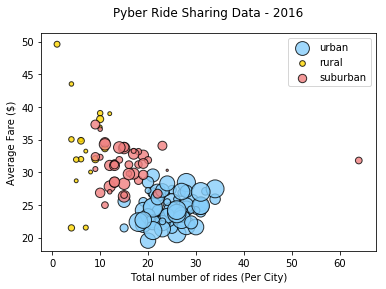

In [11]:
#bubble chart - Pyber Bubble Chart


#colors "gold", "lightskyblue", "lightcoral"
plt.scatter(urban_tot_rides,urban_avg_fare,s=5*urban_tot_drivers,color="lightskyblue",edgecolors="black",label="urban",alpha=0.8)
plt.scatter(rural_tot_rides,rural_avg_fare,s=5*rural_tot_drivers,color="gold",edgecolors="black", label="rural",alpha=0.8)
plt.scatter(suburban_tot_rides,suburban_avg_fare,s=5*suburban_tot_drivers,color="lightcoral",edgecolors="black",label="suburban",alpha=0.8)

plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="best")
# Move title up with the "y" option
plt.title("Pyber Ride Sharing Data - 2016",y=1.05)

plt.show()

# Pie Charts

# Total Fares by City Type

In [12]:
tot_fares = pyber_data.groupby(["type"]).sum()["fare"].rename("Total Fares by City Type")
tot_fares

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: Total Fares by City Type, dtype: float64

In [13]:
#Labels for pie chart #2 - Total Rides by City Type
fares_labels= tot_fares.keys()
fares_labels

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

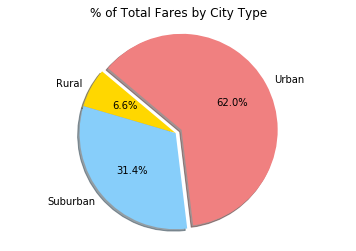

In [14]:
#Pie chart #1
# % of Total Fares by City Type pie chart
drivers_colors=["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Fares by City Type")
explode = (0, 0, 0.07)
plt.pie(tot_fares, explode=explode, labels=fares_labels, colors=drivers_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Total Rides by City Type

In [15]:
tot_ridestype = pyber_data.groupby(["type"]).count()["ride_id"].rename("Total Rides by City Type")
tot_ridestype

type
Rural        125
Suburban     657
Urban       1625
Name: Total Rides by City Type, dtype: int64

In [16]:
#Labels for pie chart #2 - Total Rides by City Type
rides_labels= tot_ridestype.keys()
rides_labels

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

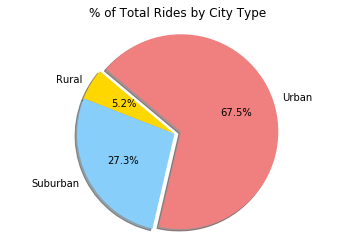

In [17]:
#Pie chart #2
# % of Total Rides by City Type pie chart
drivers_colors=["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Rides by City Type")
explode = [0, 0, 0.07]
plt.pie(tot_ridestype, explode=explode, labels=rides_labels, colors=drivers_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Total Drivers by City Type

In [18]:
#Amount for pie chart - Drivers by Type
tot_driversbytype = pyber_data.groupby(["type"]).sum()["driver_count"]
tot_driversbytype

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [19]:
#Labels for pie chart - Drivers by Type
drivers_labels= tot_driversbytype.keys()
drivers_labels

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

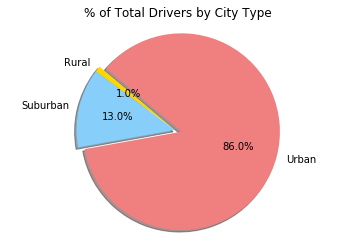

In [20]:
#Pie chart #3
# % of Drivers per City Type pie chart
drivers_colors=["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Drivers by City Type")
explode = (0, 0, 0.07)
plt.pie(tot_driversbytype, explode=explode, labels=drivers_labels, colors=drivers_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

#three observable trends based on the data
1.  Urban by far has more rides and therefore more fares.
2.  Rural is small that it might be hard to find drivers.
3.  Suburban is bringing in 31.4% of the fares with only 27% of the rides.  The revenue per ride is good in Suburban.